<a href="https://colab.research.google.com/github/siddhanthnagrath1/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

Importing the K-Nearest Neighbors classifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier

Step 1: Load the Dataset

In [3]:
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Step 2: Basic Statistical Overview

In [4]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

Step 3: Correlation Heatmap

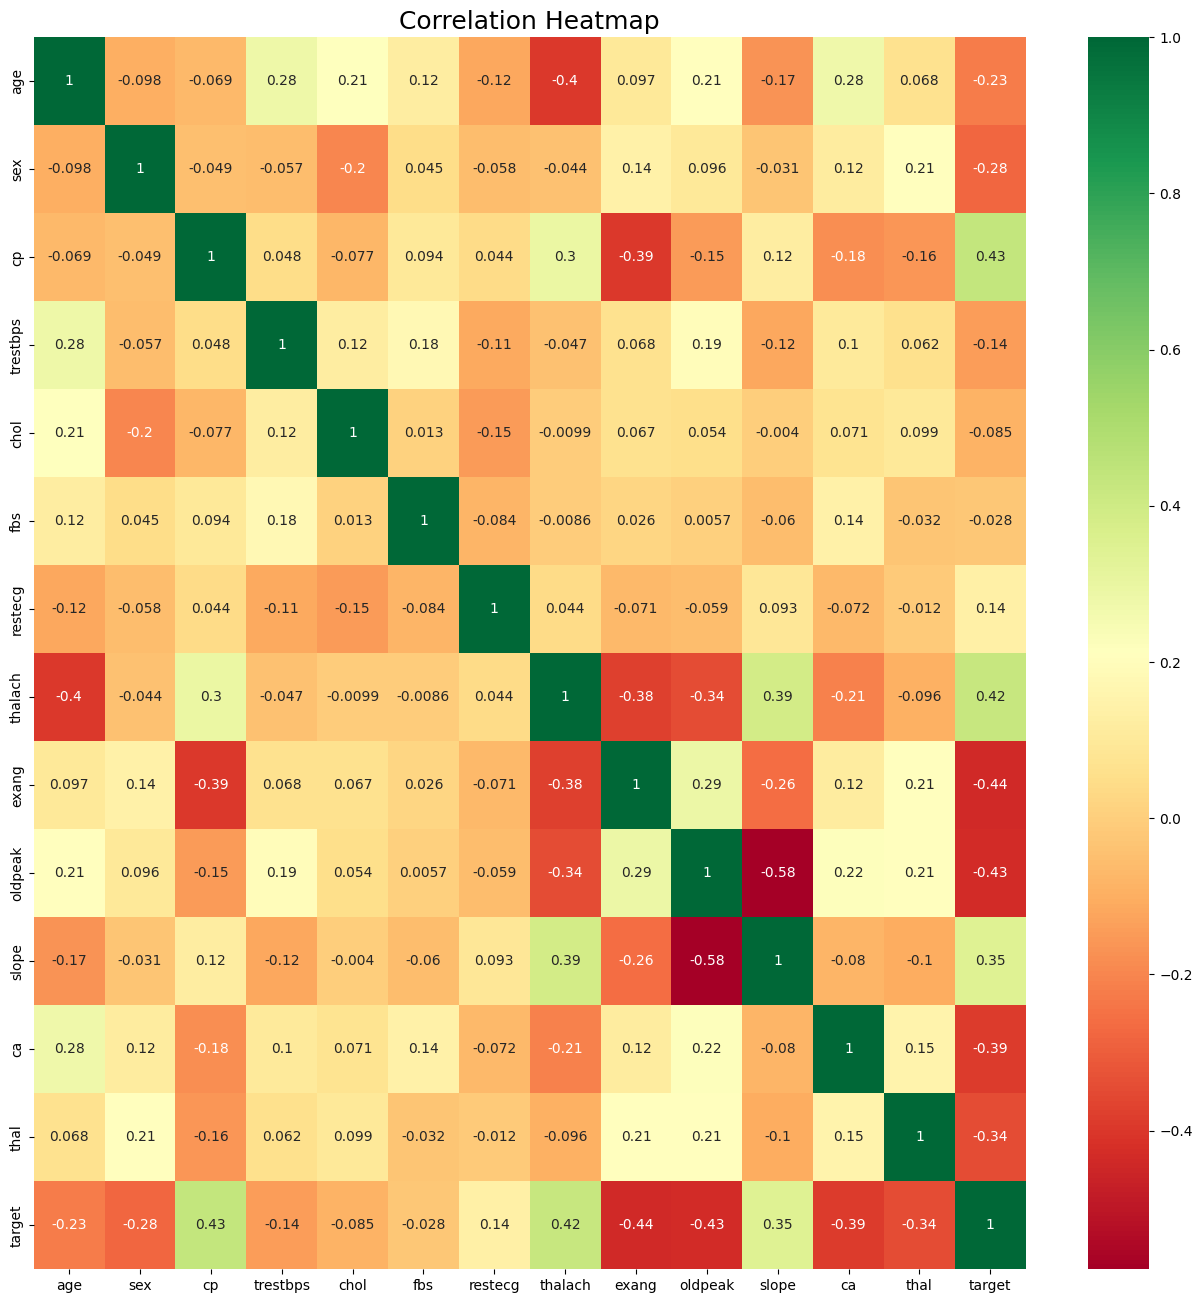

In [5]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap", fontsize=18)
plt.show()


Step 4: Target Variable Distribution

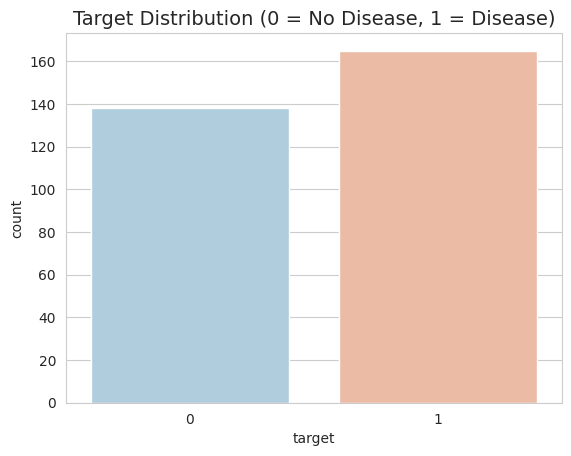

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='RdBu_r')
plt.title("Target Distribution (0 = No Disease, 1 = Disease)", fontsize=14)
plt.show()

Step 5: Data Preprocessing

In [7]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal'])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


 Step 6: Split Data into Features and Labels

In [8]:
y = dataset['target']
X = dataset.drop(['target'], axis=1)


Step 7: Evaluate KNN with Cross-Validation

In [9]:
from sklearn.model_selection import cross_val_score

knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())


Step 8: Plot KNN Accuracy for Different K Value

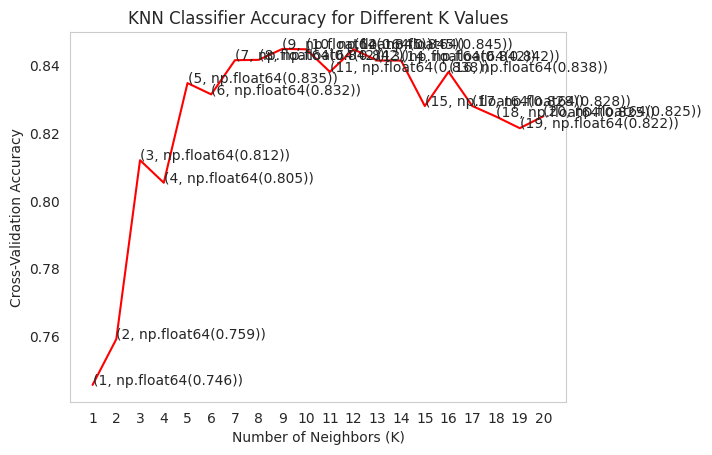

In [10]:
plt.plot([k for k in range(1, 21)], knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 3)))
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.grid()
plt.show()

Step 9: Final KNN Accuracy at Optimal K (K=12)

In [11]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
score = cross_val_score(knn_classifier, X, y, cv=10)
print("KNN Accuracy with K=12:", score.mean())

KNN Accuracy with K=12: 0.8448387096774195


Step 10: Random Forest Classifier Accuracy

In [12]:
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators=10)
score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Random Forest Accuracy:", score.mean())

Random Forest Accuracy: 0.811505376344086
